# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/johnmcgraw/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv('NEWS_API')


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language='en',sort_by='relevancy')
btc_articles

{'status': 'ok',
 'totalResults': 7568,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Paul Ford',
   'title': 'A Field Guide for Nature-Resistant Nerds',
   'description': 'Yes, yes, the dirt is horrifying. But it’s also how we make bitcoin apps.',
   'url': 'https://www.wired.com/story/a-field-guide-for-nature-resistant-nerds-microchips-climate-change/',
   'urlToImage': 'https://media.wired.com/photos/61086c497b8c62be3062fe82/191:100/w_1280,c_limit/WI090121_MG_Ford_01.jpg',
   'publishedAt': '2021-08-06T11:00:00Z',
   'content': 'When my wife started a little garden in our urban backyard, all I could think about were the worms. Also the bugs, and the dirt, which is of course filled with worms and bugs and composted corn cobs.… [+3499 chars]'},
  {'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Khari Johnson',
   'title': 'Why Not Use Self-Driving Cars as Supercomputers?',
   'description': 'Autonomous vehicles use the equivalent of 200 laptops to 

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum',language='en',sort_by='relevancy')
eth_articles

{'status': 'ok',
 'totalResults': 2968,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Lucas Matney',
   'title': 'Tenderly raises $15.3M to help Ethereum developers ship decentralized apps faster',
   'description': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the crypto space in 2021. The latest crypto startup to court the attenti…',
   'url': 'http://techcrunch.com/2021/07/29/tenderly-raises-15-3m-to-help-ethereum-developers-ship-decentralized-apps-faster/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2021/07/Tenderly-Founding-Team-1.jpg?w=600',
   'publishedAt': '2021-07-29T18:27:16Z',
   'content': 'Blockchain infrastructure startups are heating up as industry fervor brings more developers and users to a space that still feels extremely young despite a heavy institutional embrace of the cr

In [6]:
# Create the Bitcoin sentiment scores DataFrame
def get_sentiment_score(article, based_on):
    sentiments = []

    for article in article["articles"]:
        try:
            text = article[based_on]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            sentiments.append({
                "Compound": compound,
                "Negative": neg,
                "Neutral": neu,
                "Positive": pos,
                based_on : text
            })

        except AttributeError:
            pass

    # Create DataFrame
    df = pd.DataFrame(sentiments)
    return df

btc_sentiment_df = get_sentiment_score(btc_articles, 'content')
btc_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.3400,0.061,0.939,0.000,When my wife started a little garden in our ur...
1,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and..."
2,0.4019,0.000,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...
3,-0.8860,0.271,0.729,0.000,"By Joe TidyCyber reporter \r\n""Follow the mone..."
4,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...
5,0.5106,0.000,0.904,0.096,T-Mobile will offer two years of free identity...
6,0.2732,0.000,0.903,0.097,"As longtime TechCrunch readers know well, Mich..."
7,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe..."
8,0.1280,0.075,0.836,0.089,"SINGAPORE, July 28 (Reuters) - Bitcoin broke a..."
9,0.0000,0.000,1.000,0.000,T-Mobile is grappling with yet another reporte...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment_df = get_sentiment_score(eth_articles, 'content')
eth_sentiment_df

,Compound,Negative,Neutral,Positive,content
0,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...
1,0.6956,0.000,0.810,0.190,Cent was founded in 2017 as an ad-free creator...
2,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe..."
3,0.0000,0.000,1.000,0.000,Representation of the Ethereum virtual currenc...
4,0.0000,0.000,1.000,0.000,"HONG KONG, Aug 5 (Reuters) - Ether held near t..."
5,0.0000,0.000,1.000,0.000,Representations of cryptocurrencies Bitcoin an...
6,0.3400,0.000,0.895,0.105,Cryptocurrencies spiked Monday after Amazon li...
7,-0.3612,0.094,0.855,0.050,"By Mary-Ann RussonBusiness reporter, BBC News\..."
8,0.0000,0.000,1.000,0.000,"Vitalik Buterin, founder of ethereum, during T..."
9,0.0000,0.000,1.000,0.000,Representations of cryptocurrency Ethereum are...


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.034640,0.040100,0.912850,0.047050
std,0.435160,0.069485,0.074081,0.058669
min,-0.886000,0.000000,0.729000,0.000000
25%,-0.307000,0.000000,0.861750,0.000000
50%,0.000000,0.000000,0.914500,0.000000
75%,0.416125,0.076250,1.000000,0.090750
max,0.690800,0.271000,1.000000,0.178000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.075400,0.015300,0.94395,0.040700
std,0.306664,0.031872,0.06275,0.061063
min,-0.440400,0.000000,0.81000,0.000000
25%,0.000000,0.000000,0.91450,0.000000
50%,0.000000,0.000000,0.94800,0.000000
75%,0.243725,0.000000,1.00000,0.059000
max,0.695600,0.094000,1.00000,0.190000


### Questions:

Q: Which coin had the highest mean positive score?

A: Both have the same positive mean of .040750

Q: Which coin had the highest compound score?

A: Ethereum - .695600

Q. Which coin had the highest positive score?

A: Ethereum - .1900000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stop_words = set(stopwords.words('english'))





In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean.lower())

    
    # Lemmatize words into root words
    root_words = [lemmatizer.lemmatize(word) for word in words]
    
    return root_words
   
    # Convert the words to lowercase
    words = [word for word in words if word not in stop_words]

    
    # Remove the stop words
    words = word_tokenize(re_clean)
    
    return root_words

In [13]:
# Create a new tokens column for Bitcoin
btc_sentiment_df['tokens'] = btc_sentiment_df['content'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.3400,0.061,0.939,0.000,When my wife started a little garden in our ur...,"[when, my, wife, started, a, little, garden, i..."
1,0.6908,0.000,0.822,0.178,"Like Dogecoin devotees, the mayor of Reno, and...","[like, dogecoin, devotee, the, mayor, of, reno..."
2,0.4019,0.000,0.920,0.080,Photo by Joe Raedle/Getty Images\r\n\n \n\n Tw...,"[photo, by, joe, raedlegetty, image, twitter, ..."
3,-0.8860,0.271,0.729,0.000,"By Joe TidyCyber reporter \r\n""Follow the mone...","[by, joe, tidycyber, reporter, follow, the, mo..."
4,0.6240,0.000,0.873,0.127,To get a roundup of TechCrunchs biggest and mo...,"[to, get, a, roundup, of, techcrunchs, biggest..."


In [14]:
# Create a new tokens column for Ethereum
eth_sentiment_df['tokens'] = eth_sentiment_df['content'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,content,tokens
0,-0.2411,0.061,0.939,0.000,Blockchain infrastructure startups are heating...,"[blockchain, infrastructure, startup, are, hea..."
1,0.6956,0.000,0.810,0.190,Cent was founded in 2017 as an ad-free creator...,"[cent, wa, founded, in, 2017, a, an, adfree, c..."
2,0.5719,0.000,0.861,0.139,"After the bell today, Coinbase reported anothe...","[after, the, bell, today, coinbase, reported, ..."
3,0.0000,0.000,1.000,0.000,Representation of the Ethereum virtual currenc...,"[representation, of, the, ethereum, virtual, c..."
4,0.0000,0.000,1.000,0.000,"HONG KONG, Aug 5 (Reuters) - Ether held near t...","[hong, kong, aug, 5, reuters, ether, held, nea..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [23]:
from collections import Counter
from nltk import ngrams

In [24]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens


btc_tokens = get_tokens(btc_sentiment_df)
eth_tokens = get_tokens(eth_sentiment_df)

In [25]:
# Generate the Bitcoin N-grams where N=2
def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

bigram_btc = bigram_counter(btc_tokens, 2)

In [26]:
# Generate the Ethereum N-grams where N=2
bigram_eth = bigram_counter(eth_tokens, 2)

In [27]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [28]:
# Use token_count to get the top 10 words for Bitcoin
token_count_btc=token_count(btc_tokens)
token_count_btc

[('the', 25),
 ('a', 21),
 ('of', 20),
 ('char', 19),
 ('in', 16),
 ('and', 14),
 ('is', 10),
 ('bitcoin', 10),
 ('it', 9),
 ('to', 9)]

In [29]:
# Use token_count to get the top 10 words for Ethereum
token_count_eth= token_count(eth_tokens)
token_count_eth

[('the', 26),
 ('char', 20),
 ('of', 18),
 ('ethereum', 14),
 ('on', 12),
 ('a', 11),
 ('and', 10),
 ('for', 10),
 ('to', 9),
 ('in', 9)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

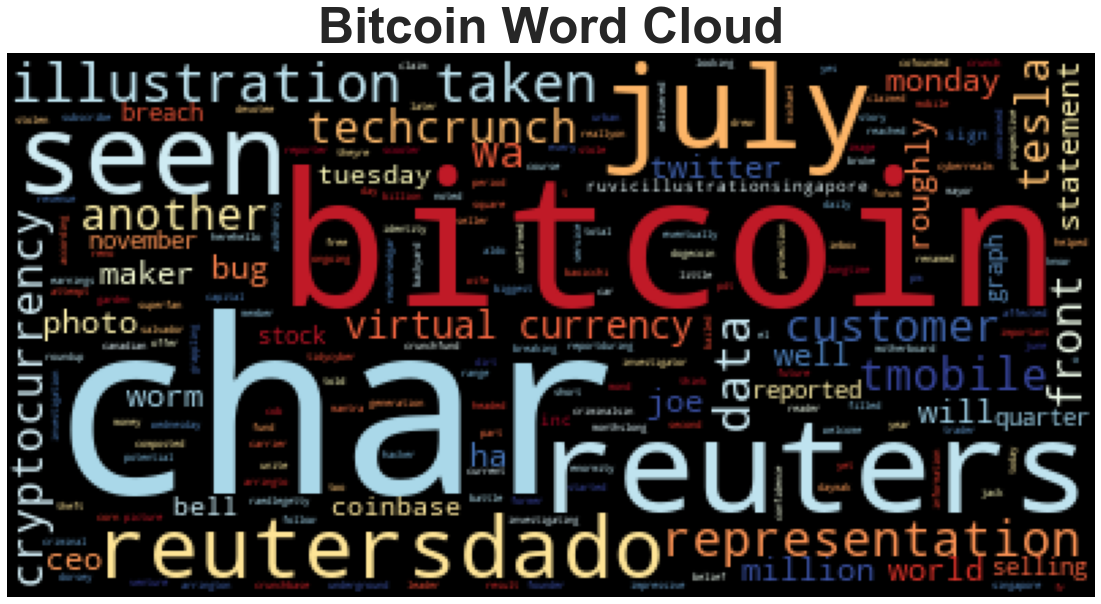

In [32]:
# Generate the Bitcoin word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(btc_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

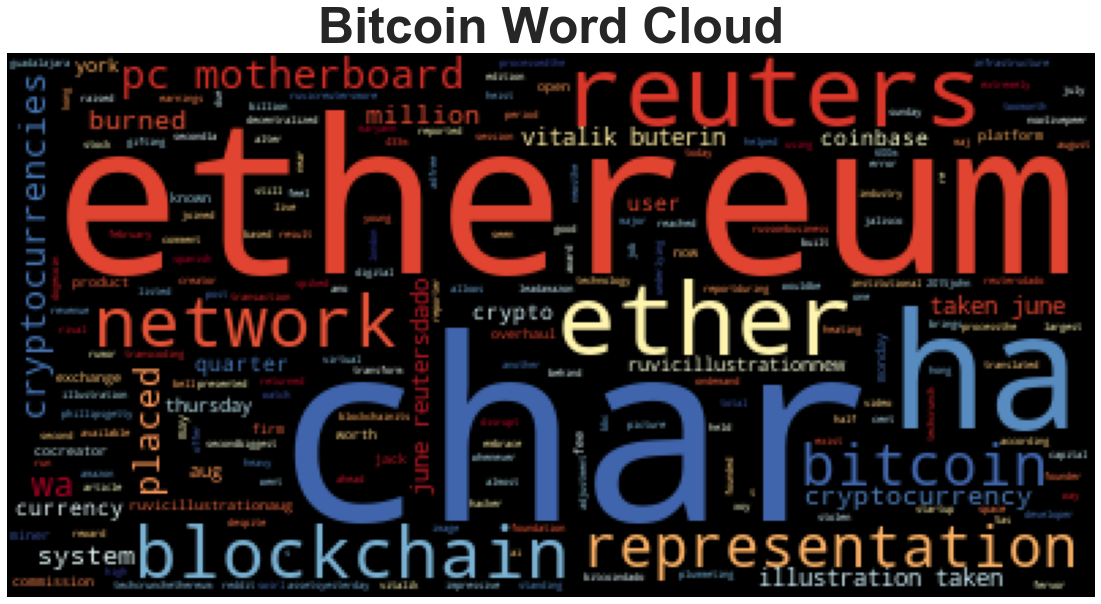

In [33]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(" ".join(eth_tokens))
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 50, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy

In [35]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.6 MB 6.1 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [36]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [38]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_sentiment_df['content'])

In [39]:
# Run the NER processor on all of the text
doc= nlp(btc_content)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [40]:
# Render the visualization
displacy.render(doc, style='ent')

In [41]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))

Reno GPE
El Salvador GPE
Aldo Baoicchi GPE
Canadian NORP
Daymak ORG
Joe Raedle PERSON
Twitter PRODUCT
Square PRODUCT
Jack Dorsey PERSON
Monday DATE
Joe TidyCyber PERSON
every day DATE
3 p.m. PDT TIME
Daily Crunch ORG
July 23, 2021 DATE
two years DATE
roughly 49 million CARDINAL
Michael Arrington PERSON
TechCrunch LOC
Crunchbase ORG
CrunchFund PRODUCT
Tuesday DATE
2017 DATE
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
SINGAPORE GPE
July 28 DATE
Reuters ORG
40,000 MONEY
Wednesday DATE
Motherboard PERSON
T-Mobile ORG
Roughly 47.8 million CARDINAL
June 7, 2021 DATE
REUTERS ORG
Edgar Su/IllustrationAug PERSON
Reuters ORG
7.07% PERCENT
47,587.38 MONEY
2200 CARDINAL
James Martin/CNET PERSON
UK GPE
Spain GPE
Twitter PRODUCT
2020 DATE
the US Department of Justi ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/IllustrationSINGAPORE ORG
July 21 DATE
Reuters ORG
Reuters ORG
FILE ORG
November 19, 2020 DATE
REUTERS ORG
Dado Ruvic/Illustration


---

### Ethereum NER

In [42]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_sentiment_df['content'])

In [43]:
# Run the NER processor on all of the text
doc= nlp(eth_content)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(doc, style='ent')

In [44]:
# List all Entities
for ent in doc.ents:
    print('{} {}'.format(ent.text, ent.label_))


2017 DATE
Reddit NORP
Ethereum PERSON
today DATE
Coinbase PERSON
its second quarter DATE
the quarter DATE
Coinbase ORG
$2.23 billion MONEY
Ethereum PERSON
February 3, 2018 DATE
REUTERS ORG
Dado Ruvic PERSON
Aug 5 DATE
Reuters ORG
HONG KONG GPE
Aug 5 DATE
Reuters ORG
two-month DATE
Thursday DATE
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic/IllustrationAug 3 PERSON
Reuters ORG
Ethereum PERSON
Monday DATE
Amazon ORG
Amazon ORG
BBC News ORG
almost half CARDINAL
$600m MONEY
433 MONEY
Yesterday DATE
Vitalik Buterin PERSON
TechCrunch Disrupt London 2015 ORG
John Phillips PERSON
Vitalik Buterin PERSON
Ethereum PERSON
June 29, 2021 DATE
REUTERS ORG
Dado Ruvic PERSON
July 30 DATE
Reuters ORG
second ORDINAL
More than $144 million MONEY
August 5 DATE
Sunday DATE
over 45,799 CARDINAL
second ORDINAL
Dado Ruvic PERSON
Reuters ORG
More than $144 million MONEY
Livepeer PERSON
$20 million MONEY
Ethereum PERSON
Spanish NORP
AI ORG
Xoy Capital PERSON
Guadalajara GPE
Jalisco GPE
Xoycoin PERSON

---